# Results graph generator

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# TASK 3

In [ ]:
# utilities
class_res_path = './results/task3_classifiers_results.csv'
reg_res_path = './results/task3_regressors.csv'
plot_path= './results/'

def get_plot(x, y, path, hue= None, legend_title=None, data= None, title= None, labels= None, orient= 'v'):
    sns.barplot(x=x, y=y, hue=hue, data=data, orient=orient)

    if title:
        plt.title(title)
    
    if labels:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])

    if hue and legend_title:
        plt.legend(title=legend_title, loc='lower left')
    
    plt.savefig(path)

In [102]:
class_res = pd.read_csv(class_res_path, index_col=0)

rf = class_res[class_res['model'] == 'random forest']
knn = class_res[class_res['model'] == 'knn']
mlp = class_res[class_res['model'] == 'mlp']

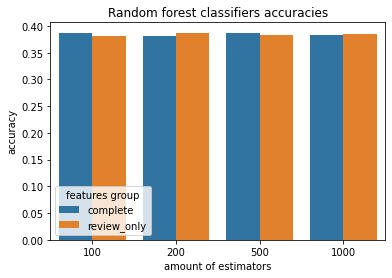

In [111]:
get_plot(
    x= rf['params'].apply(lambda row: eval(row)['n_estimators']),
    y= 'score',
    data= rf,
    hue= 'features_group',
    legend_title='features group',
    title='Random forest classifiers accuracies',
    labels=('amount of estimators', 'accuracy'),
    path= f'{plot_path}rf_accuracies.png')


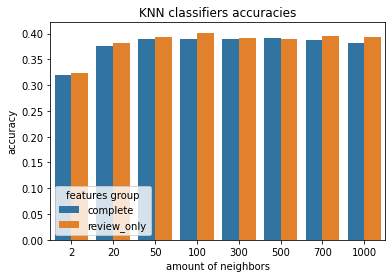

In [113]:
get_plot(
    x= knn['params'].apply(lambda row: eval(row)['n_neighbors']),
    y= 'score',
    data= knn,
    hue= 'features_group',
    legend_title='features group',
    title='KNN classifiers accuracies',
    labels=('amount of neighbors', 'accuracy'),
    path= f'{plot_path}knn_accuracies.png')

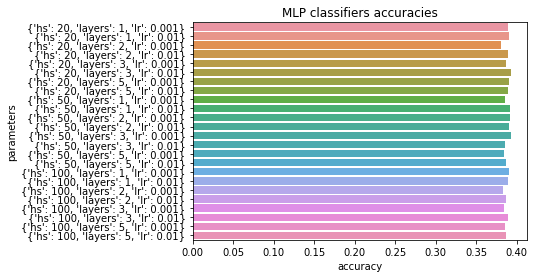

In [115]:
get_plot(
    x= 'score',
    y= mlp['params'],
    data= mlp,
    orient='h',
    title='MLP classifiers accuracies',
    labels=('accuracy', 'parameters'),
    path= f'{plot_path}mlp_accuracies.png')